In [1]:
import warnings; 
warnings.simplefilter('ignore')

# 0. Install and Import Dependencies

In [2]:
import pandas as pd
from fbprophet import Prophet
import pickle
import datetime

# 1. Read in Data and Process Dates

Data set:    [[[-0.06657371]
  [-0.04981095]
  [-0.03310659]
  ...
  [ 0.30050689]
  [ 0.29790122]
  [ 0.29532761]]

 [[-0.06859129]
  [-0.05126447]
  [-0.03399733]
  ...
  [ 0.34696373]
  [ 0.3452061 ]
  [ 0.34347831]]

 [[-0.06907575]
  [-0.05180134]
  [-0.03458674]
  ...
  [ 0.29794357]
  [ 0.29523921]
  [ 0.29256932]]

 ...

 [[-0.06941363]
  [-0.05187886]
  [-0.03440303]
  ...
  [ 0.3007645 ]
  [ 0.2992479 ]
  [ 0.29778421]]

 [[-0.0683659 ]
  [-0.05090044]
  [-0.03349436]
  ...
  [ 0.29501561]
  [ 0.2934691 ]
  [ 0.29197409]]

 [[-0.06950268]
  [-0.05196727]
  [-0.03449072]
  ...
  [ 0.31945081]
  [ 0.31838454]
  [ 0.3173658 ]]]
grid_points:    (array([ 43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,

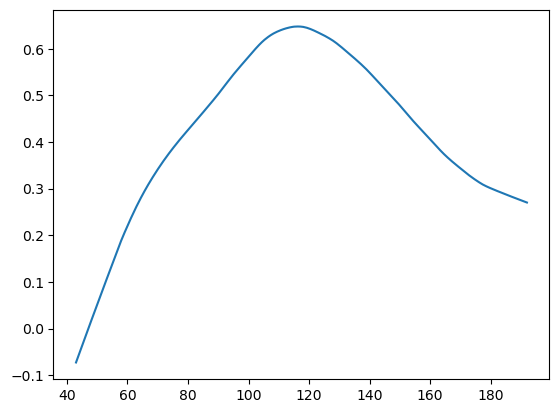

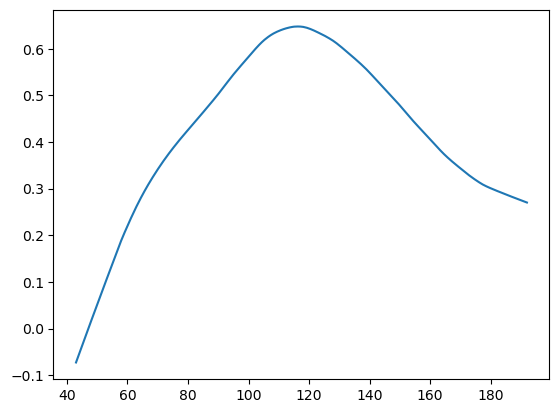

In [3]:
with open('hdvi.pickle', 'rb') as handle:
    NDVI = pickle.load(handle)
print(NDVI)
NDVI[30].plot()

In [4]:
rangeForNewDate = range(43,193)

days = []
zeroDay = datetime.datetime.strptime("2017-01-01","%Y-%m-%d")

for a in rangeForNewDate:
    days.append((zeroDay + datetime.timedelta(days=a)))
serie = NDVI[40].data_matrix.flatten()


d = {'ds': days, 'y': serie}
data = pd.DataFrame(data=d)

In [5]:
data.head()

,ds,y
0,2017-02-13,-0.072685
1,2017-02-14,-0.054671
2,2017-02-15,-0.036719
3,2017-02-16,-0.018831
4,2017-02-17,-0.001009


# 2. Train Model

In [6]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


# 3. Forecast Away

In [7]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-02-13,-0.072204,-0.076609,-0.066298,-0.072204,-0.072204,0.000735,0.000735,0.000735,0.000623,0.000623,0.000623,0.000111,0.000111,0.000111,0.0,0.0,0.0,-0.071470
1,2017-02-14,-0.054592,-0.059323,-0.048475,-0.054592,-0.054592,0.000817,0.000817,0.000817,0.000623,0.000623,0.000623,0.000194,0.000194,0.000194,0.0,0.0,0.0,-0.053775
2,2017-02-15,-0.036979,-0.041486,-0.031240,-0.036979,-0.036979,0.000922,0.000922,0.000922,0.000623,0.000623,0.000623,0.000299,0.000299,0.000299,0.0,0.0,0.0,-0.036056
3,2017-02-16,-0.019366,-0.023806,-0.013933,-0.019366,-0.019366,0.000437,0.000437,0.000437,0.000623,0.000623,0.000623,-0.000187,-0.000187,-0.000187,0.0,0.0,0.0,-0.018930
4,2017-02-17,-0.001754,-0.006720,0.004022,-0.001754,-0.001754,0.000410,0.000410,0.000410,0.000623,0.000623,0.000623,-0.000213,-0.000213,-0.000213,0.0,0.0,0.0,-0.001343


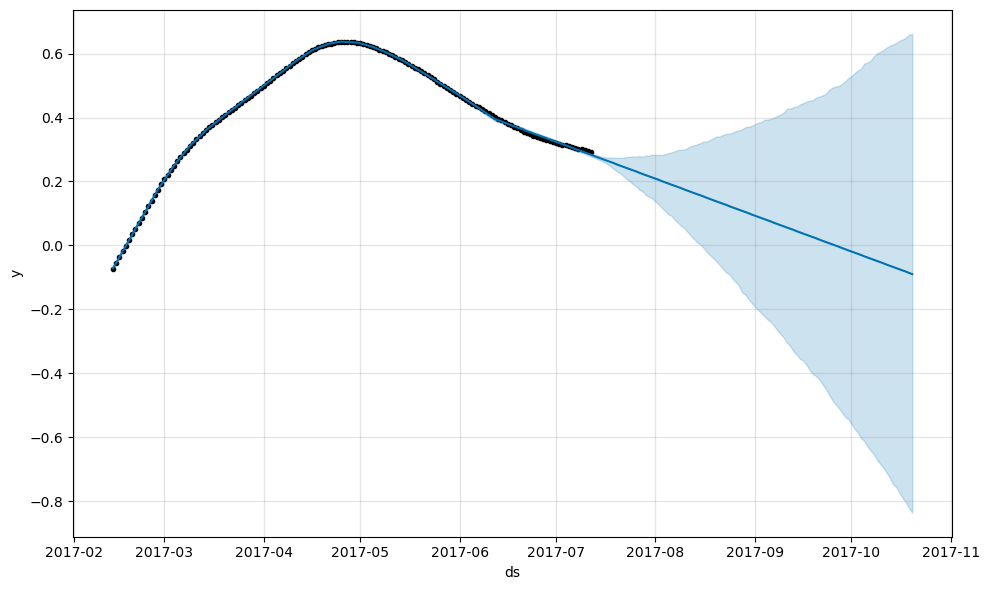

In [8]:
plot1 = m.plot(forecast)

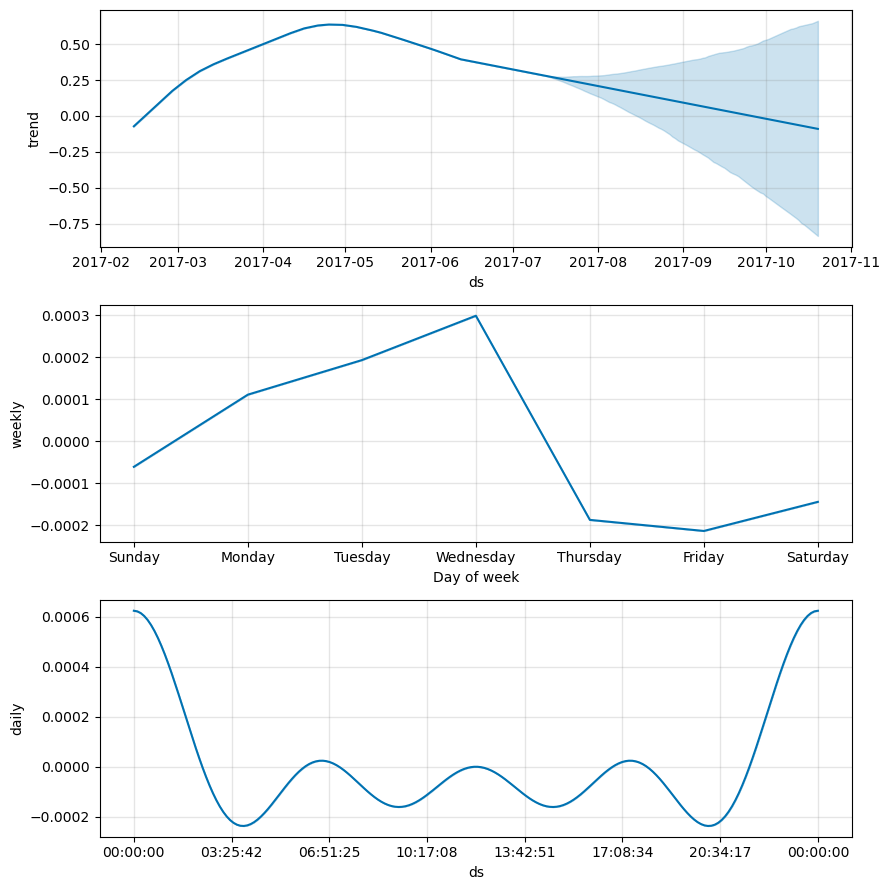

In [9]:
plt2 = m.plot_components(forecast)